# 1 

In the unsupervised analysis section, I have employed the K-means clustering technique to partition the dataset into four distinct clusters. The determination of the optimal K value (in this case, K=4) was accomplished through a comprehensive evaluation, leveraging both the elbow method and the Silhouette score as key assessment criteria.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn
sklearn.__version__

'1.1.3'

In [3]:
'1.0.2'
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl

In [4]:
df = pd.read_csv('dataClustering.csv',header= None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7
0,5.640720,9.180183,10.288661,7.621833,5.129126,-10.199154,0.366043,9.132704
1,7.962137,4.390779,6.513514,5.391677,7.692616,-7.506085,-0.565842,10.024006
2,-0.299819,-3.566931,-5.836508,-4.744202,-1.569449,-4.212983,6.049983,-10.130941
3,3.744348,5.615159,8.551187,5.847903,4.274492,-7.364897,-2.982627,9.771248
4,1.013368,5.062748,0.445446,0.893973,-9.631507,-10.597874,9.043212,-5.625417


- ### Is there any missing data?

In [6]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2500 non-null   float64
 1   1       2500 non-null   float64
 2   2       2500 non-null   float64
 3   3       2500 non-null   float64
 4   4       2500 non-null   float64
 5   5       2500 non-null   float64
 6   6       2500 non-null   float64
 7   7       2500 non-null   float64
dtypes: float64(8)
memory usage: 156.4 KB


In [8]:
df.describe()

,0,1,2,3,4,5,6,7
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1.315873,0.232581,0.896288,0.087122,1.090401,-3.339787,2.240464,-0.108443
std,3.954106,5.228858,5.077481,4.727901,6.889142,7.209843,3.865706,7.133844
min,-8.698889,-11.193478,-9.457285,-9.339854,-15.230702,-13.945810,-6.936272,-12.505452
25%,-1.775723,-4.483005,-3.245982,-3.951103,-4.619885,-9.002019,-1.203084,-6.707006
50%,1.507305,0.952378,0.434354,-0.826818,2.323784,-6.065858,2.549141,-0.665478
75%,4.368305,5.041142,4.801078,4.173922,7.094056,1.304818,5.690469,6.581960
max,10.944158,9.781216,12.767959,12.210710,14.405188,13.798018,11.805946,13.952436


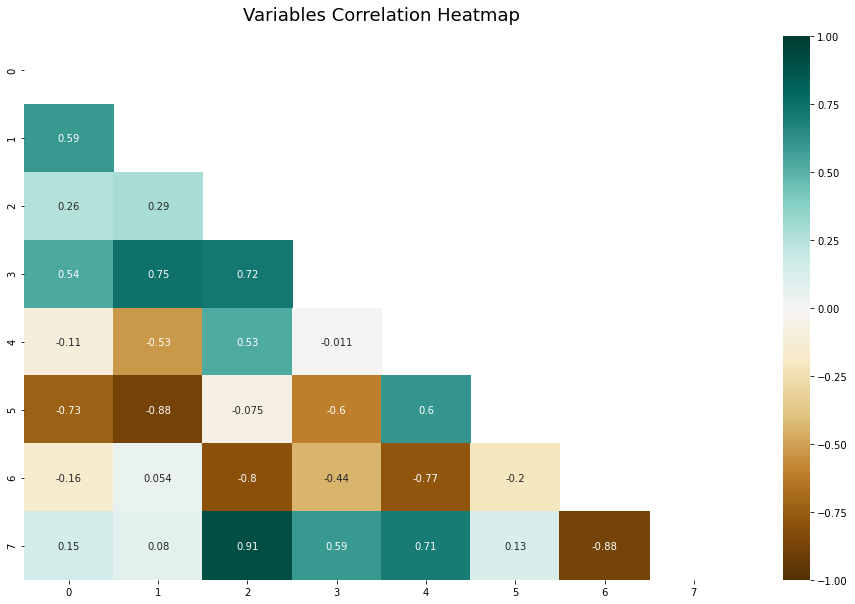

In [9]:
plt.figure(figsize=(16, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variables Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

- ### Prepare data for machine learning

In [10]:
from sklearn import preprocessing
#df_copy= df.copy()

In [11]:
#scaler=preprocessing.MinMaxScaler()
#df_copy=scaler.fit_transform(df_copy)

- ### K-means Clustering

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_best_k(data,start,end):
    """This funtion finds the best K for Kmeans Clustering Using Elbow method and silhouette_score"""
    
    Sum_of_squared_distances = []
    silhouette_scores = []
    
    k_range = range(start, end)

    for k in k_range:
        km = KMeans(n_clusters=k, init='k-means++', n_init=14, max_iter=500, random_state=0)
        km.fit(data)
        
        Sum_of_squared_distances.append(km.inertia_)
        silhouette_avg = silhouette_score(data, km.labels_).mean()
        silhouette_scores.append(silhouette_avg)
        
    # Find the index of the largest silhouette score
    max_silhouette_idx = silhouette_scores.index(max(silhouette_scores))
    best_k = k_range[max_silhouette_idx]
    
    # Print the largest silhouette score and the corresponding K value
    print(f"Largest Silhouette Score: {max(silhouette_scores):.4f} (K = {best_k})")
    
    # Plot the Sum of Squared Distances (Elbow Method) and Silhouette Score
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_range, Sum_of_squared_distances, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method')
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
# find_best_k(data)


In [13]:
def cluster_sizes(input_data,clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(input_data[clusters == c])
    return size

Largest Silhouette Score: 0.6978 (K = 4)


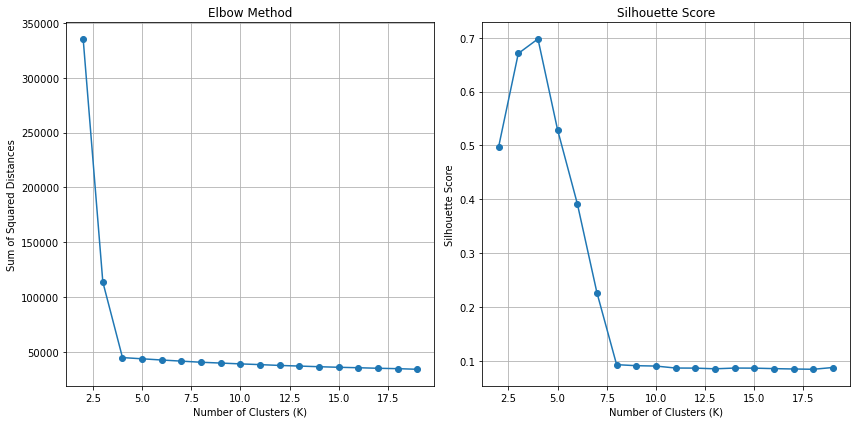

In [14]:
data= df
find_best_k(data,2,20)

- ### Run Kmean for K = 4 

In [15]:
kmeans = KMeans(n_clusters=4, max_iter=500, verbose=1,n_init=5) # initialization

In [16]:
kmeans.fit(data)

Initialization complete
Iteration 0, inertia 85786.83383537404.
Iteration 1, inertia 44687.686168716304.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 85112.22192535657.
Iteration 1, inertia 44687.686168716304.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 82362.0072639189.
Iteration 1, inertia 44687.68616871631.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 78871.52036459159.
Iteration 1, inertia 44687.686168716304.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 83193.17250570624.
Iteration 1, inertia 44687.686168716304.
Converged at iteration 1: strict convergence.


KMeans(max_iter=500, n_clusters=4, n_init=5, verbose=1)

In [17]:
clusters = kmeans.predict(data)

In [18]:
cluster_pd=pd.DataFrame(clusters, columns=["Cluster"])
cluster_pd.head()

,Cluster
0,1
1,1
2,0
3,1
4,3


In [19]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
centroids

,0,1,2,3,4,5,6,7
0,2.76,-2.52,-5.27,-4.78,-0.84,-3.72,5.27,-8.09
1,6.11,4.92,7.95,6.72,5.43,-9.08,-2.38,9.16
2,-3.90,-6.62,2.18,-3.16,8.70,8.30,-0.05,3.93
3,0.29,5.15,-1.28,1.56,-8.93,-8.86,6.12,-5.43


In [20]:
size = cluster_sizes(data,clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  625
Size of Cluster 1 =  625
Size of Cluster 2 =  625
Size of Cluster 3 =  625


In [21]:
silhouettes = metrics.silhouette_samples(data, clusters)
print(silhouettes.mean())

0.6978398809771043


In [22]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

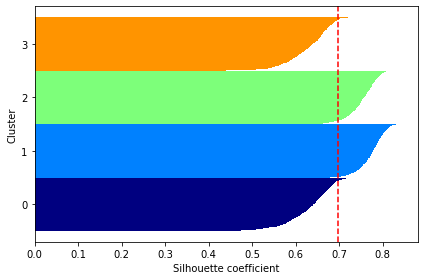

In [23]:
plot_silhouettes(data, clusters)

# 1b Classification

- #### The subsequent phase involves the application of various classification algorithms to construct a classifier using the clustered data. The models in question encompass multinomial logistic regression, decision trees, decision trees with feature selection, and random forests. Given the balanced nature of the classes, the metric of choice for model evaluation is accuracy.
- #### Notably, all models exhibited strong performance across the training, validation, and testing sets. This noteworthy consistency raises concerns regarding potential overfitting, data distribution disparities, and a potential lack of diversity, which may render the dataset unrepresentative of real-world data distributions.

#### Get Data Ready for Classification

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
RANDOM_STATE = 42

In [26]:
X = data
y = cluster_pd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

<AxesSubplot:xlabel='Cluster'>

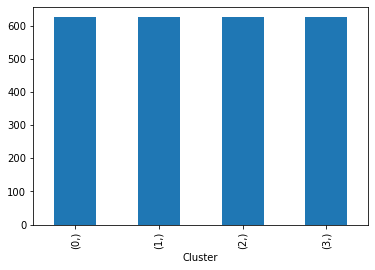

In [27]:
y.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Cluster'>

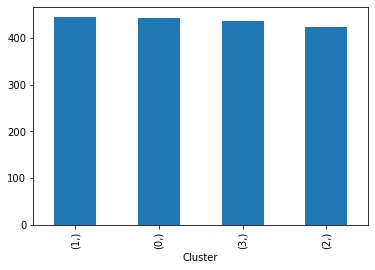

In [28]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Cluster'>

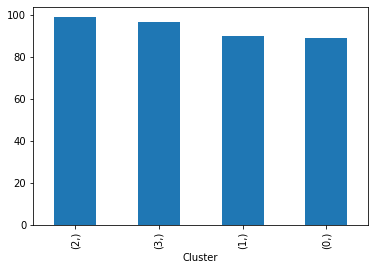

In [29]:
y_val.value_counts().plot(kind='bar')

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
def fun_print_scores_multiclass(fitted_estimator, X, y_true):
    '''
    Takes as input a fitted model, X, and target labels.
    Prints scores for multiclass classification.
    '''
    y_pred = fitted_estimator.predict(X)
    
    print("Accuracy.....: {:.3f}".format(metrics.accuracy_score(y_true, y_pred)))
    print("Bal. Accuracy: {:.3f}".format(metrics.balanced_accuracy_score(y_true, y_pred)))
    print("Macro F1.....: {:.3f}".format(metrics.f1_score(y_true, y_pred, average="macro")))
    print("Micro F1.....: {:.3f}".format(metrics.f1_score(y_true, y_pred, average="micro")))
    
    # Print class-wise precision, recall, and F1-score
    class_report = metrics.classification_report(y_true, y_pred)
    metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='all')

In [31]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def apply_classifier(estimator, X_train, X_val, y_train, y_val, df_results, append_results=False, name=''):
    # Train the classifier
    estimator.fit(X_train, y_train)
    
    # Predict on the training and validation sets
    y_pred_train = estimator.predict(X_train)
    y_pred_val = estimator.predict(X_val)
    
    # Calculate classification metrics
    accuracy_train = accuracy_score(y_train, y_pred_train).round(3)
    accuracy_val = accuracy_score(y_val, y_pred_val).round(3)
    
    precision_train = precision_score(y_train, y_pred_train, average='macro').round(3)
    precision_val = precision_score(y_val, y_pred_val, average='macro').round(3)
    
    recall_train = recall_score(y_train, y_pred_train, average='macro').round(3)
    recall_val = recall_score(y_val, y_pred_val, average='macro').round(3)
    
    f1_train = f1_score(y_train, y_pred_train, average='macro').round(3)
    f1_val = f1_score(y_val, y_pred_val, average='macro').round(3)
    

    
    # Create a DataFrame to store the results
    df_results_new = pd.DataFrame(data=[[accuracy_train, accuracy_val, precision_train, precision_val, 
                                        recall_train, recall_val, f1_train, f1_val]],
                                  columns=['acc_train', 'acc_val', 'precision_train', 'precision_val',
                                           'recall_train', 'recall_val', 'f1_train', 'f1_val'], index=[name])
    
    if append_results:
        if df_results is None:
            df_results = df_results_new
        else:
            df_results = pd.concat([df_results, df_results_new], axis=0)
    else:  # Create the results of the new model
        df_results = df_results_new
    
    return df_results


## Multinomial  Regression 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [34]:
# Standardize the feature data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)

# Create and train the multinomial logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train,y_train)

#Accuracy Train
pred_train = logistic_reg.predict(X_train)
print("Accuracy Score (Train): ", metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Val
pred = logistic_reg.predict(X_val)
print("Accuracy Score (Val): ", metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Score (Train):  1.0
Accuracy Score (Val):  1.0


In [35]:
print(metrics.classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        99
           3       1.00      1.00      1.00        97

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



Accuracy.....: 1.000
Bal. Accuracy: 1.000
Macro F1.....: 1.000
Micro F1.....: 1.000


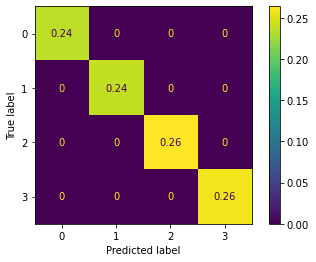

In [36]:
fun_print_scores_multiclass(logistic_reg, X_val, y_val)

Accuracy.....: 1.000
Bal. Accuracy: 1.000
Macro F1.....: 1.000
Micro F1.....: 1.000


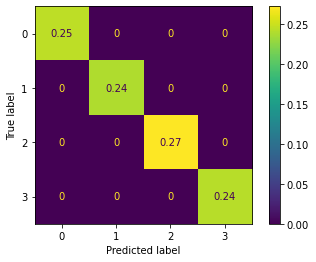

In [37]:
fun_print_scores_multiclass(logistic_reg, X_test, y_test)

In [38]:
df_results = None
df_results = apply_classifier(logistic_reg, X_train, X_val, y_train, y_val, 
                             df_results, append_results=False, name="Multinomial Regression")
df_results

,acc_train,acc_val,precision_train,precision_val,recall_train,recall_val,f1_train,f1_val
Multinomial Regression,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Decision Tree Model

In [39]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

dt.fit(X_train,y_train)

#Accuracy Train
pred_train = dt.predict(X_train)
print("Accuracy Score (Train): ", metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Val
pred = dt.predict(X_val)
print("Accuracy Score (Val): ", metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Score (Train):  1.0
Accuracy Score (Val):  1.0


In [41]:
print(metrics.classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        99
           3       1.00      1.00      1.00        97

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



Accuracy.....: 1.000
Bal. Accuracy: 1.000
Macro F1.....: 1.000
Micro F1.....: 1.000


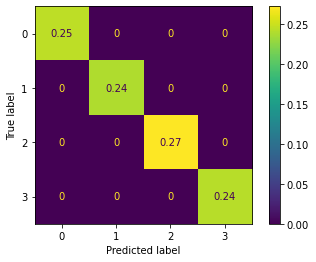

In [42]:
fun_print_scores_multiclass(dt, X_test, y_test)

In [43]:
df_results = apply_classifier(dt, X_train, X_val, y_train, y_val, 
                             df_results, append_results=True, name="Decision Tree")
df_results

,acc_train,acc_val,precision_train,precision_val,recall_train,recall_val,f1_train,f1_val
Multinomial Regression,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Decision Tree,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


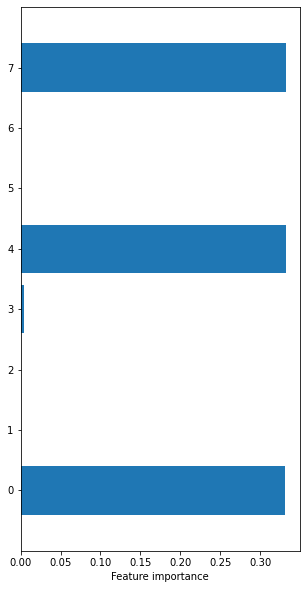

In [44]:
plt.figure(figsize=[5,10])
plot_feature_importances(dt, df=data)

In [45]:
# Get feature importance scores
feature_importance = dt.feature_importances_
feature_importance

array([0.33051627, 0.        , 0.        , 0.00455448, 0.33221733,
       0.        , 0.        , 0.33271192])

In [46]:
df_imp = pd.DataFrame(data= {"columns":X.columns, "scores": dt.feature_importances_})
df_imp

,columns,scores
0,0,0.33
1,1,0.00
2,2,0.00
3,3,0.00
4,4,0.33
5,5,0.00
6,6,0.00
7,7,0.33


In [47]:
selected_features = df_imp.loc[df_imp.scores > 0.05, "columns"].tolist()
selected_features

[0, 4, 7]

In [48]:
dt_ = DecisionTreeClassifier(random_state=RANDOM_STATE)

dt_.fit(X_train[selected_features], y_train)


DecisionTreeClassifier(random_state=42)

Accuracy.....: 0.997
Bal. Accuracy: 0.997
Macro F1.....: 0.997
Micro F1.....: 0.997


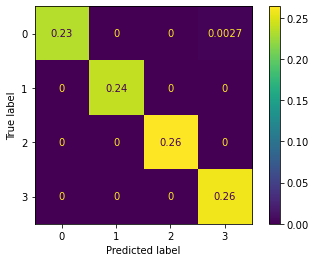

In [49]:
fun_print_scores_multiclass(dt_, X_val[selected_features], y_val)

In [50]:
df_results = apply_classifier(dt_, X_train, X_val, y_train, y_val, 
                             df_results, append_results=True, name="Decision Tree with Important Features")
df_results

,acc_train,acc_val,precision_train,precision_val,recall_train,recall_val,f1_train,f1_val
Multinomial Regression,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Decision Tree,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Decision Tree with Important Features,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


- ### Random Forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy.....: 1.000
Bal. Accuracy: 1.000
Macro F1.....: 1.000
Micro F1.....: 1.000


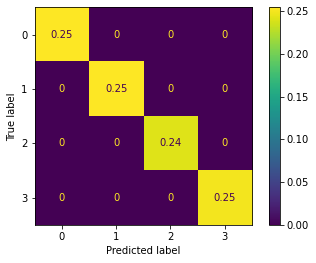

In [53]:
fun_print_scores_multiclass(rf, X_train, y_train)

Accuracy.....: 1.000
Bal. Accuracy: 1.000
Macro F1.....: 1.000
Micro F1.....: 1.000


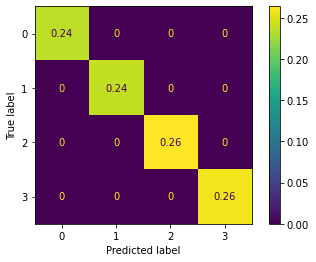

In [54]:
fun_print_scores_multiclass(rf, X_val, y_val)

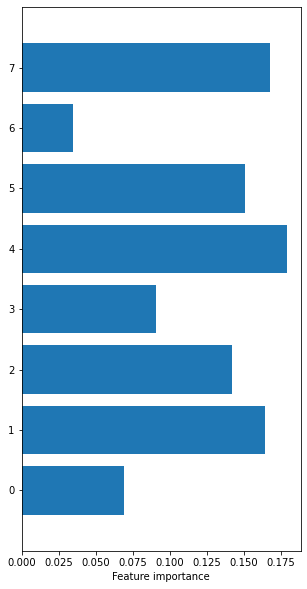

In [55]:
plt.figure(figsize=[5,10])
plot_feature_importances(rf, df=X_train)

In [56]:
df_results = apply_classifier(rf, X_train, X_val, y_train, y_val, 
                             df_results, append_results=True, name="Random Forest")
df_results

,acc_train,acc_val,precision_train,precision_val,recall_train,recall_val,f1_train,f1_val
Multinomial Regression,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Decision Tree,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Decision Tree with Important Features,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Random Forest,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Accuracy.....: 1.000
Bal. Accuracy: 1.000
Macro F1.....: 1.000
Micro F1.....: 1.000


Accuracy.....: 1.000
Bal. Accuracy: 1.000
Macro F1.....: 1.000
Micro F1.....: 1.000


Accuracy.....: 1.000
Bal. Accuracy: 1.000
Macro F1.....: 1.000
Micro F1.....: 1.000


Accuracy.....: 1.000
Bal. Accuracy: 1.000
Macro F1.....: 1.000
Micro F1.....: 1.000




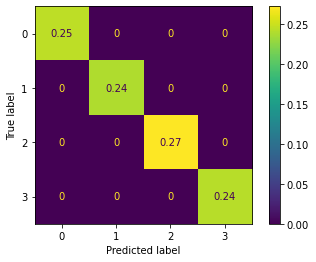

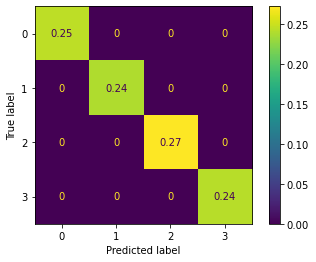

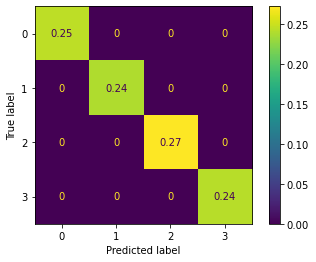

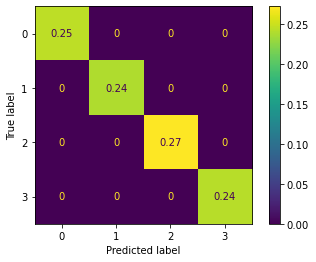

In [57]:
models=[logistic_reg,dt,dt_,rf]
for model in models:
    fun_print_scores_multiclass(model, X_test, y_test)
    print("\n")

 # 2 Prediction

- #### In this segment, a three-part dataset comprising training, validation, and test subsets was employed to construct, fine-tune, and evaluate an Ordinary Least Squares (OLS) regression model. The tuning process, which involved optimizing the polynomial degree, was carried out on the validation set, with Root Mean Square Error (RMSE) serving as the primary evaluation metric. The ultimate choice for the polynomial degree that was incorporated into the final model is 7.


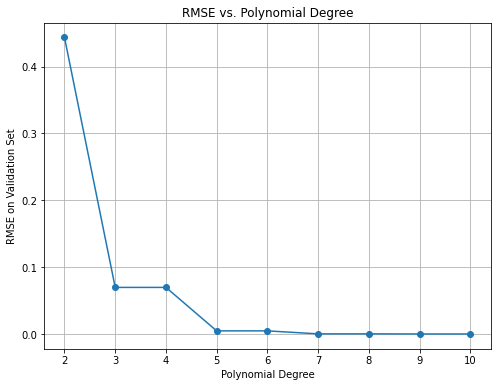

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the data from CSV files
xvalsSine_data = pd.read_csv('xvalsSine.csv')
cleanSine_data = pd.read_csv('cleanSine.csv')

# Extract features (x-values) and labels (sine(x))
X = xvalsSine_data.values
y = cleanSine_data.values

# Perform a random train/validation/test split (70% training, 15% validation, 15% testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize variables to store the best degree and its corresponding RMSE
best_degree = 2
best_rmse = float('inf')

# Initialize lists to store RMSE values for different degrees
rmse_values = []

# Loop through polynomial degrees from 2 to 10
for degree in range(2, 11):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Train the OLS regression model
    ols_reg = LinearRegression()
    ols_reg.fit(X_train_poly, y_train)
    
    #make prediction on train set
    y_train_pred= ols_reg.predict(X_train_poly)
    
    # Make predictions on the validation set
    y_val_pred = ols_reg.predict(X_val_poly)
    

    # Calculate RMSE on the validation set
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    rmse_values.append(rmse)
    
    # Update the best degree if a lower RMSE is found
    if rmse < best_rmse:
        best_degree = degree
        best_rmse = rmse

# Plot RMSE values for different degrees
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), rmse_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE on Validation Set')
plt.title('RMSE vs. Polynomial Degree')
plt.grid()
plt.show()

#print("Best Polynomial Degree (based on Validation RMSE):", best_degree)
#print("Best Validation RMSE:", best_rmse)


In [59]:
# Train the final model with the best degree on the combined training and validation data
poly = PolynomialFeatures(degree=7)
X_train_poly = poly.fit_transform(X_train)
ols_reg = LinearRegression()
ols_reg.fit(X_train_poly, y_train)



# Evaluate the final model on the test set
X_test_poly = poly.transform(X_test)
y_test_pred = ols_reg.predict(X_test_poly)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("Test RMSE for Best Degree:", test_rmse)

Test RMSE for Best Degree: 0.00014241404429043367


In [60]:
def error_rmse(true, pred):
    '''
    Returns the RMSE based on given true and predicted arrays.
    Both inputs are assumed to be numoy arrays
    '''
    from sklearn import metrics
    return np.sqrt(metrics.mean_squared_error(true, pred))

In [61]:
def print_regression_results(y_train, pred_train, y_val, pred_val):
    print('Train R2: {}'.format(metrics.r2_score(y_train, pred_train)))
    print('Validation R2: {}'.format(metrics.r2_score(y_val, pred_val)))
    print('Train error: {}'.format(error_rmse(y_train, pred_train)))
    print('Validation error: {}'.format(error_rmse(y_val, pred_val)))

In [62]:
print_regression_results(y_train, y_train_pred,y_val, y_val_pred)

Train R2: 0.9999999999736716
Validation R2: 0.9999999999673919
Train error: 3.6441798871348656e-06
Validation error: 3.867268493870357e-06


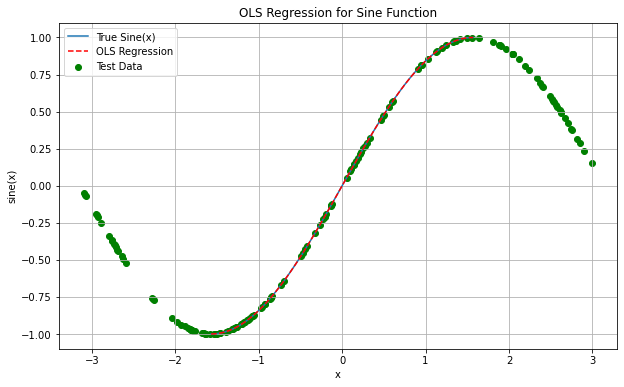

In [63]:
# Plot the original sine function and the regression results
x_range = np.linspace(-np.pi / 2, np.pi / 2, 100)
y_range = np.sin(x_range)
y_pred_range = ols_reg.predict(poly.transform(x_range.reshape(-1, 1)))

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label='True Sine(x)')
plt.plot(x_range, y_pred_range, label='OLS Regression', linestyle='--', color='red')
plt.scatter(X_test, y_test, label='Test Data', marker='o', color='green')
plt.xlabel('x')
plt.ylabel('sine(x)')
plt.title('OLS Regression for Sine Function')
plt.legend()
plt.grid()
plt.show()